# Green screen (keying FX)

This assignment covers point wise, and probabilistic texture segmentation which is useful for keying special effects in movie productions.

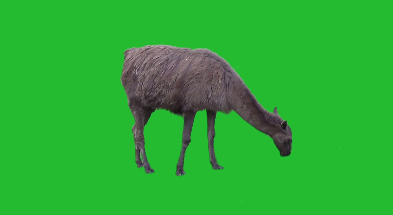

The purpose is to build the best model of the green screen color, and compute a probability green-screen map. In the second stage, the goal is apply image composite (alpha blending) where there is the green screen.  
A sample output is this:

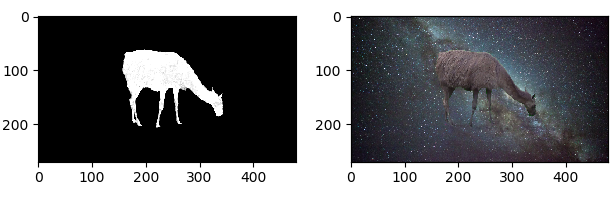

# Setup



In [44]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

root_ds = '.'

## Mounting Google Drive (Google Colab only)
First, we'll mount the distant Google Drive locally. We assume here you have created a shortcut `2020-MSAIMove_computervision_shared` pointing to the class shared folder.

Rather than downloading, distant mounting ensure fast access without need of download.

In [72]:
if 'google.colab' in str(get_ipython()):
  import os
  from google.colab import drive
  drive.mount('/content/drive')

 # root_ds = '/content/drive/MyDrive/2021-MSAIMove_computervision_shared/datasets/'
  root_ds = '/content/drive/MyDrive/Colab Notebooks/datasets'
  assert(os.path.exists(root_ds))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exercise

First, let's load the alpaca video and the milky way.

In [103]:
# Open the alpaca video
gs_cap = cv2.VideoCapture(os.path.join(root_ds, '../datasets/misc/green_screen_Alpaca.mov'))
assert(gs_cap.isOpened())

# Open the milky way video
bg_cap = cv2.VideoCapture(os.path.join(root_ds, '../datasets/misc/milky_way.mp4'))
assert(bg_cap.isOpened())

If you want to write the output video (at the end), you should run that code
```
ret, gs_frame = gs_cap.read()
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (gs_frame.shape[0], gs_frame.shape[1]))
```



Now, let's loop through the video with the `isOpened()` function and compute the distance to the green value (your job).

# Code de l'Énoncé

In [ ]:
while gs_cap.isOpened():
  ret, gs_frame = gs_cap.read()  # Capture the green screen image
  ret, bg_frame = bg_cap.read()  # Capture the bg image
  
  gs_frame = gs_frame / 255.
  bg_frame = bg_frame / 255.

  # Compute the distance to the green value
  dist = np.zeros((gs_frame.shape[0], gs_frame.shape[1]))  # Remove that line
  # CODE HERE

  # You will need to adjust the shape of dist for the code to run
  dist = np.expand_dims(dist, axis=-1)*bg_frame
  fx_frame = gs_frame + (1. - dist) * (bg_frame - gs_frame)
  
  # Plot
  plt.figure('dist')
  plt.subplot(1, 2, 1)
  plt.imshow(dist, cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(gs_frame[..., ::-1])
  plt.draw()
  plt.show()
  # plt.waitforbuttonpress(0.01)

gs_cap.release()
bg_cap.release()
plt.show(block=True)

#TESTS

##Test 1: Quelques tests préliminaires


(1080, 1920, 3)
[[0.18039216 0.18039216 0.18039216 ... 0.18039216 0.18039216 0.18039216]
 [0.18039216 0.18039216 0.18039216 ... 0.18039216 0.18039216 0.18039216]
 [0.18039216 0.18039216 0.18039216 ... 0.18039216 0.18039216 0.18039216]
 ...
 [0.18039216 0.18039216 0.18039216 ... 0.18039216 0.18039216 0.18039216]
 [0.18039216 0.18039216 0.18039216 ... 0.18039216 0.18039216 0.18039216]
 [0.18039216 0.18039216 0.18039216 ... 0.18039216 0.18039216 0.18039216]]
[[0.72941176 0.72941176 0.72941176 ... 0.72941176 0.72941176 0.72941176]
 [0.72941176 0.72941176 0.72941176 ... 0.72941176 0.72941176 0.72941176]
 [0.72941176 0.72941176 0.72941176 ... 0.72941176 0.72941176 0.72941176]
 ...
 [0.72941176 0.72941176 0.72941176 ... 0.72941176 0.72941176 0.72941176]
 [0.72941176 0.72941176 0.72941176 ... 0.72941176 0.72941176 0.72941176]
 [0.72941176 0.72941176 0.72941176 ... 0.72941176 0.72941176 0.72941176]]


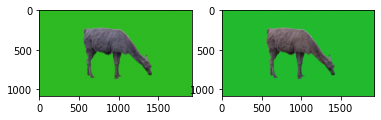

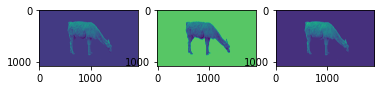

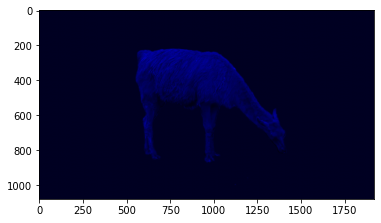

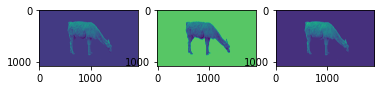

In [43]:
from matplotlib.backend_bases import GraphicsContextBase
#Test 1

print(gs_frame.shape)

print(gs_frame[..., 0])
print(gs_frame[..., 1])
#access to all the pixel of the first channel which is the channel 0 (BLUE)
plt.figure(1)
plt.subplot(121)
plt.imshow(gs_frame)
plt.subplot(122)
plt.imshow(gs_frame[..., ::-1])

plt.figure(2)
plt.subplot(131)
plt.imshow(gs_frame[..., 0]) # Bleu
plt.subplot(132)
plt.imshow(gs_frame[..., 1]) # Green
plt.subplot(133)
plt.imshow(gs_frame[..., 2])  #Red
plt.draw()

#TT
TT = np.copy(gs_frame)
TT[..., 0] = 0
TT[..., 1] = 0
plt.figure(3)
plt.imshow(TT)

#TTT

B, G, R = cv2.split(gs_frame)
plt.figure(10)
plt.subplot(131)
plt.imshow(B)
plt.subplot(132)
plt.imshow(G)
plt.subplot(133)
plt.imshow(R)


plt.show()

## Test 2: Avec un mask

In [ ]:
while gs_cap.isOpened():
  ret, gs_frame = gs_cap.read()  # Capture the green screen image
  ret, bg_frame = bg_cap.read()

  # Conversion des images RGB en BGR
  gs_frame = cv2.cvtColor(gs_frame, cv2.COLOR_RGB2BGR)
  bg_frame = cv2.cvtColor(bg_frame, cv2.COLOR_RGB2BGR)

  # Copy des images
  gs_frame_BGR = np.copy(gs_frame)
  bg_frame_BGR = np.copy(bg_frame)

  # Creer les bornes
  low_green = np.array([0,100,0])
  upper_green = np.array([115,255,120])

  # Creation du mask
  mask = cv2.inRange(gs_frame, low_green, upper_green)

  # Application du mask
  gs_frame_M = np.copy(gs_frame_BGR)
  bg_frame_M = np.copy(bg_frame_BGR)

  gs_frame_M[mask != 0] = [0,0,0]
  bg_frame_M[mask == 0] = [0,0,0]

  # Assemblage final
  Final_image = gs_frame_M + bg_frame_M

  plt.figure(1)
  plt.subplot(121)
  plt.imshow(gs_frame_M)
  plt.subplot(122)
  plt.imshow(bg_frame_M)

  plt.figure(2)
  plt.imshow(Final_image)

  plt.show()

gs_cap.release()
bg_cap.release()
plt.show(block=True)

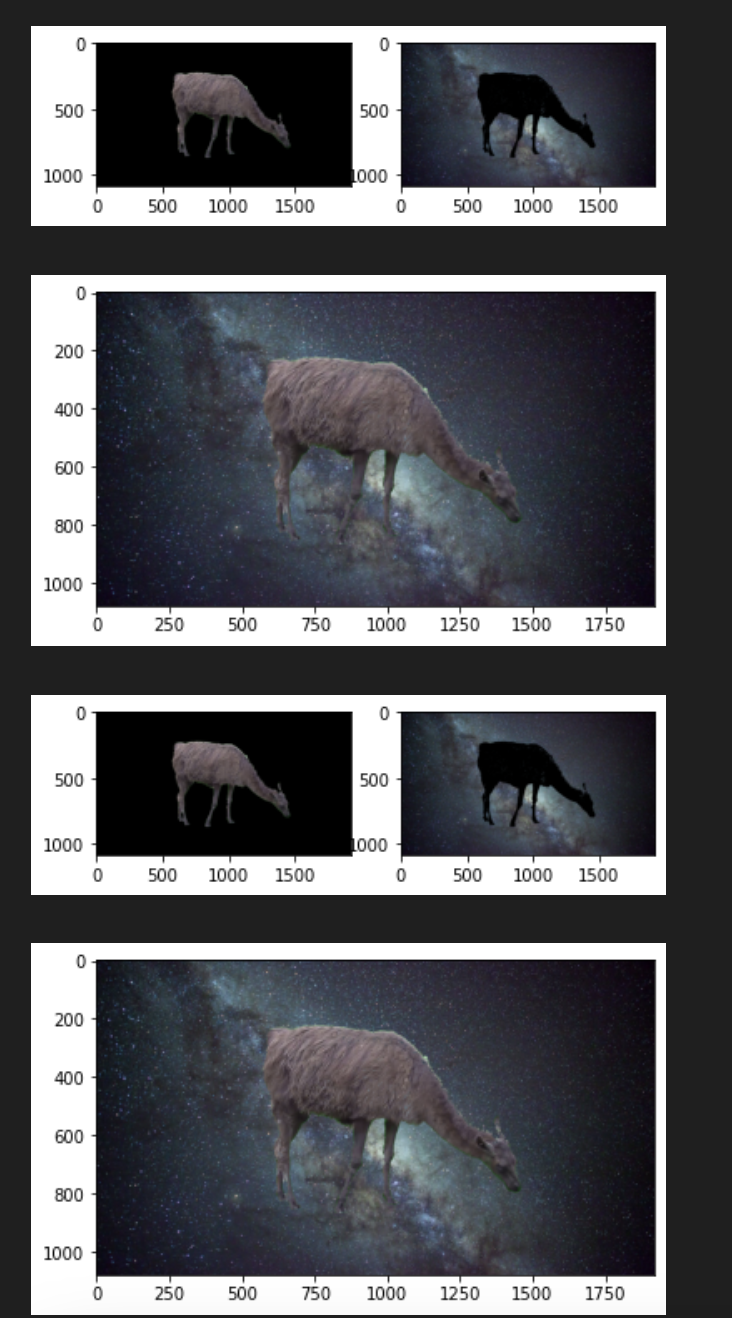